# RQ1: Education and Unemployment in Ireland

This notebook investigates the relationship between third-level education
and unemployment rates, with a focus on gender differences.

## Imports
This section imports the Python libraries required for the analysis.
- **pandas** is used for loading and manipulating the dataset
- **numpy** is used for numerical operations
- **matplotlib** is used for visualisation
- **scipy.stats** is used to compute correlation coefficients


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr


import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [67]:
%pip install seaborn scikit-learn statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.5 MB 4.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.5 MB 4.5 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.5 MB 4.4 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.5 MB 4.5 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.5 MB 4.5 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.5 MB 4.3 MB/s eta 0:00:02
   -------------------------- ------------- 6.3/9.5 MB 4.3 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.5 MB 4.4 MB/s eta 0:00:01
   ---------------------------------- ----- 8.1/9.5 MB 4.4 MB/s eta 0:00:01
   -------------------------------------- - 9.2/9.5 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 4.3 MB/s  0:00:02

   ----------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\ryano\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\ryano\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\ryano\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [43]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\ryano\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

## Loading the dataset

The dataset is loaded from a CSV file and checked to understand its structure like verify column names and data types and it checks for missing values.

In [45]:
df = pd.read_csv("C:/Users/ryano/OneDrive/Documents/MastersS3/Python/DeprivationIndex.csv")

df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 0 to 3419
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OBJECTID                                    3420 non-null   int64  
 1   ED ID                                       3420 non-null   object 
 2   ED Name                                     3420 non-null   object 
 3   Constituency                                3420 non-null   object 
 4   County                                      3420 non-null   object 
 5   Population                                  3420 non-null   int64  
 6   Pobal HP Description 2022                   3420 non-null   object 
 7   Pobal HP Index 2022                         3420 non-null   float64
 8   Age Dependency Ratio 2022 %                 3420 non-null   float64
 9   Lone Parent Ratio 2022 %                    3420 non-null   float64
 10  Prop. Primar

## Selecting Variables

This section keeps only the variables relevant to RQ1 and RQ1.1.
Column names are renamed to shorter labels.

In [46]:

cols = [
    "ED Name",
    "County",
    "Proportion at Third Level Education 2016 %",
    "Unemployment Rate - Male",
    "Unemployment Rate - Female"
]

d = df[cols].copy()

d = d.rename(columns={
    "Proportion at Third Level Education 2016 %": "third_level_pct",
    "Unemployment Rate - Male": "unemp_male",
    "Unemployment Rate - Female": "unemp_female"
})


## Data Cleaning

The selected variables are converted to numeric.
Rows with missing values in key variables are removed which prevents plots from breaking and giving misleading results.

In [47]:

for c in ["third_level_pct", "unemp_male", "unemp_female"]:
    d[c] = pd.to_numeric(d[c], errors="coerce")

d.isna().sum()
d = d.dropna(subset=["third_level_pct", "unemp_male", "unemp_female"])


## Overall Unemployment Measure

Because the dataset provides unemployment rates separately for men and women,
an overall unemployment rate is made by taking the average of the two, which allows the main relationship in RQ1 to be analysed.

In [48]:
d["unemp_overall"] = (d["unemp_male"] + d["unemp_female"]) / 2

## Descriptive Statistics

- are used to examine the distribution and range of education
and unemployment variables before further analysis.

In [49]:
d[["third_level_pct", "unemp_male", "unemp_female", "unemp_overall"]].describe()

,third_level_pct,unemp_male,unemp_female,unemp_overall
count,3420.000000,3420.000000,3420.000000,3420.000000
mean,37.511380,7.624837,7.027909,7.326373
std,10.945258,4.271566,3.790086,3.633696
min,3.958333,0.000000,0.000000,0.000000
25%,30.607183,4.783456,4.481472,4.872803
50%,35.792109,6.806283,6.459914,6.544481
75%,42.507780,9.645783,8.930942,8.934192
max,85.637343,55.000000,33.250620,40.811688


## Distribution of Key Variables

Histograms are used to visualise how third-level education and unemployment rates
are distributed across townlands.

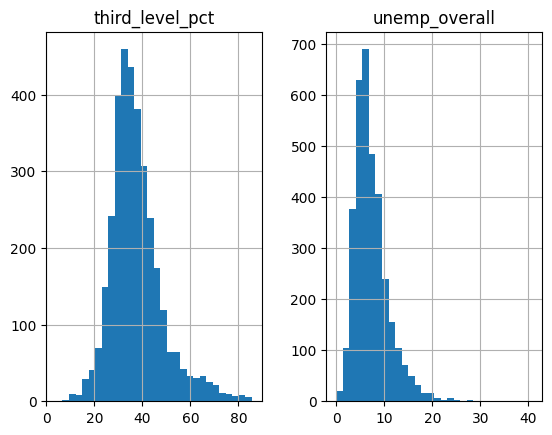

In [50]:
d[["third_level_pct", "unemp_overall"]].hist(bins=30)
plt.show()

## RQ1: Education and Overall Unemployment

This section explores the relationship between the proportion of individuals
with third-level education and the overall unemployment rate using both
visualisation and correlation analysis.

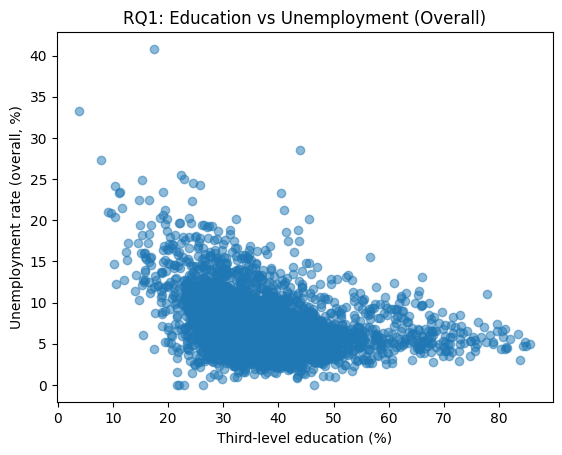

In [51]:
plt.figure()
plt.scatter(d["third_level_pct"], d["unemp_overall"], alpha=0.5)
plt.xlabel("Third-level education (%)")
plt.ylabel("Unemployment rate (overall, %)") 
plt.title("RQ1: Education vs Unemployment (Overall)")
plt.show()

In [84]:
x = d[["third_level_pct"]]
y = d[["unemp_overall"]]

pear_r, pear_p = pearsonr(x, y)
spear_r, spear_p = spearmanr(x, y)

pear_r, pear_p, spear_r, spear_p

(array([-0.34879673]),
 array([2.04992608e-98]),
 np.float64(-0.3525572336699192),
 np.float64(1.188705681875894e-100))

## RQ1.1: Gender Differences

To examine whether the relationship between education and unemployment differs
by gender, we repreat separately for male and female unemployment rates.

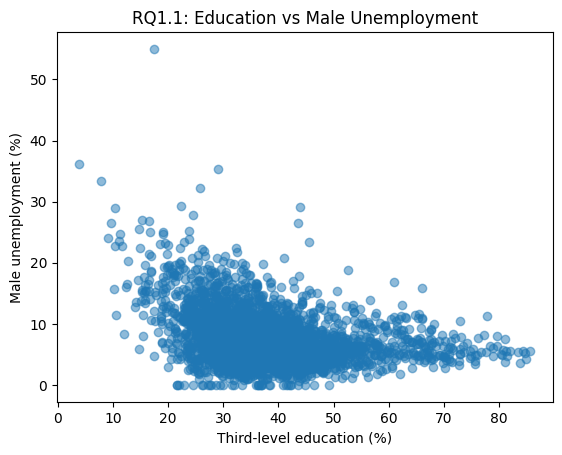

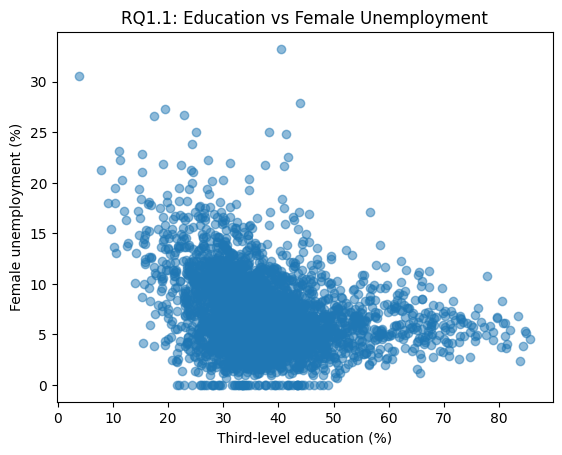

In [53]:
# Male
plt.figure()
plt.scatter(d["third_level_pct"], d["unemp_male"], alpha=0.5)
plt.xlabel("Third-level education (%)")
plt.ylabel("Male unemployment (%)")
plt.title("RQ1.1: Education vs Male Unemployment")
plt.show()

# Female
plt.figure()
plt.scatter(d["third_level_pct"], d["unemp_female"], alpha=0.5)
plt.xlabel("Third-level education (%)")
plt.ylabel("Female unemployment (%)")
plt.title("RQ1.1: Education vs Female Unemployment")
plt.show()

In [54]:
r_m, p_m = pearsonr(d["third_level_pct"], d["unemp_male"])
r_f, p_f = pearsonr(d["third_level_pct"], d["unemp_female"])

(r_m, p_m), (r_f, p_f)

((np.float64(-0.3280544057875789), np.float64(1.2821579679769314e-86)),
 (np.float64(-0.2990793755935874), np.float64(1.2864394688421584e-71)))

## Visualising Trends

Additional function is created to add fitted linear trend line into the scatterplots, which makes easier to compare the strength and direction of relationships.

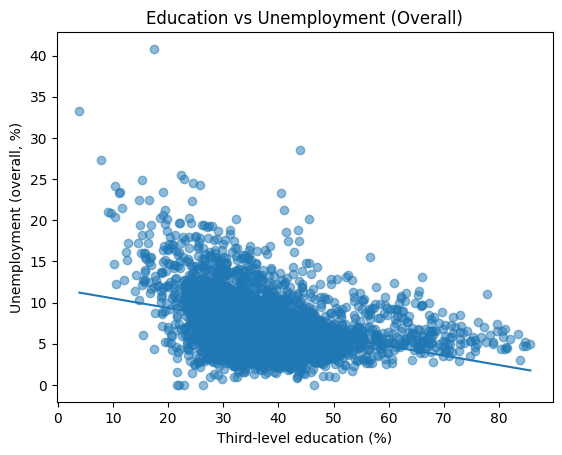

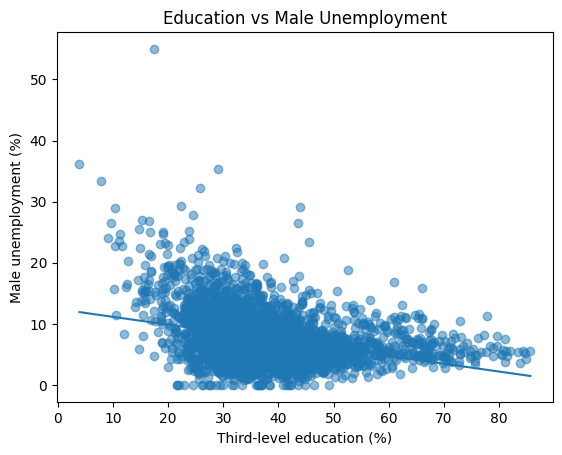

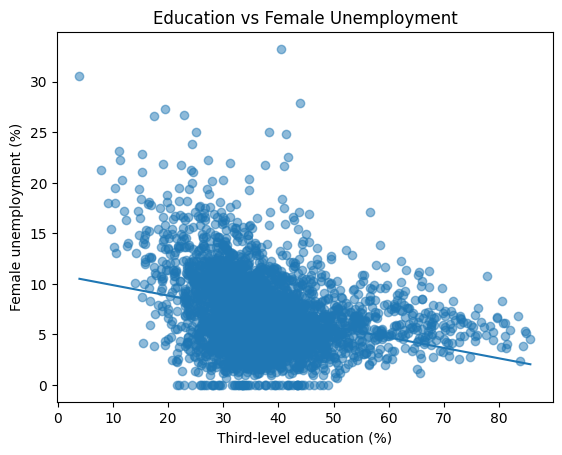

In [55]:
def scatter_with_line(x, y, xlabel, ylabel, title):
    plt.figure()
    plt.scatter(x, y, alpha=0.5)

    # line of best fit
    m, b = np.polyfit(x, y, 1)
    xs = np.linspace(x.min(), x.max(), 100)
    plt.plot(xs, m*xs + b)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

scatter_with_line(d["third_level_pct"], d["unemp_overall"],
                  "Third-level education (%)", "Unemployment (overall, %)",
                  "Education vs Unemployment (Overall)")

scatter_with_line(d["third_level_pct"], d["unemp_male"],
                  "Third-level education (%)", "Male unemployment (%)",
                  "Education vs Male Unemployment")

scatter_with_line(d["third_level_pct"], d["unemp_female"],
                  "Third-level education (%)", "Female unemployment (%)",
                  "Education vs Female Unemployment")

## Regression

Adding a Regression to better analyse the relationship between third level education and unemployment

Intercept: [11.67005526]
Slope: [-0.11579639]
R-squared: 0.12165915691810725


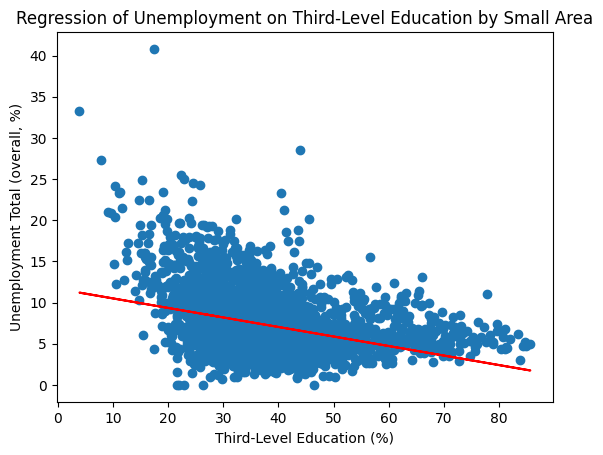

                                 OLS Regression Results                                
Dep. Variable:          unemp_overall   R-squared (uncentered):                   0.667
Model:                            OLS   Adj. R-squared (uncentered):              0.667
Method:                 Least Squares   F-statistic:                              6845.
Date:                Sat, 20 Dec 2025   Prob (F-statistic):                        0.00
Time:                        18:42:18   Log-Likelihood:                         -10160.
No. Observations:                3420   AIC:                                  2.032e+04
Df Residuals:                    3419   BIC:                                  2.033e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

KeyError: 'const'

In [ ]:
#Creating and Training Model
model = LinearRegression()
model.fit(x, y)

#Results
intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(x, y)

print("Intercept:", intercept)
print("Slope:", slope)
print("R-squared:", r_squared)

#Predict
y_pred = model.predict(x)

# Plot the data and regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color = "red")
plt.xlabel("Third-Level Education (%)")
plt.ylabel("Unemployment Total (overall, %)")
plt.title("Regression of Unemployment on Third-Level Education by Small Area")
plt.show()

model = sm.OLS(y, x).fit()

print(model.summary())



In [ ]:
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()

summary_table = pd.DataFrame({
    "Estimate": [
        model.params["const"],
        model.params["third_level_pct"],
    ],
    "Std. Error": [
        model.bse["const"],
        model.bse["third_level_pct"]
    ]
}, index=[
    "Intercept",
    "third_level_pct"
])

# Add R-squared
summary_table.loc["R-squared", "Estimate"] = model.rsquared
summary_table.loc["R-squared", "Std. Error"] = np.nan

print(summary_table)

                  Estimate  Std. Error
Intercept        11.670055    0.207955
third_level_pct  -0.115796    0.005322
R-squared         0.121659         NaN
